## Setup

In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## TidyCensus Example

This notebook grabs data from the US Census using the [tidycensus package in R](https://walker-data.com/tidycensus/index.html). Make sure you have installed the `tidyverse` and `tidycensus` packages.

In [10]:
%%R 

library(tidycensus)
library(tidyverse)

### Step 1 \| Get a Census API key and replace it in the cell below

In [11]:
%%R 

census_api_key("TKTKTKTK") # <- Insert your Census API key here

To install your API key for use in future sessions, run this function with `install = TRUE`.


### Step 2 \| Figure out what tables you want data from and at what geographic granularity

Use <https://censusreporter.org/> to figure out which tables you want.

-   Scroll to the bottom of the page to see the tables.
-   If you already know the table ID, stick that in the "Explore" section to learn more about that table.

Once you've found the variable or variables you want, you can plug them into this code under `variables`. 

In [12]:
%%R 

# the variable B01003_001 was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/


# Here are the various geographies you can use with tidycensus
# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus

# Get variable from ACS
nyc_census_data <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                      variables = c(
                        population="B01003_001",
                        total_units = "B25001_001",
                        med_inc="B19013_001"
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=T)

nyc_census_data


Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'
No encoding supplied: defaulting to UTF-8.
Error: You have supplied an invalid or inactive API key. To obtain a valid API key, visit https://api.census.gov/data/key_signup.html. To activate your key, be sure to click the link provided to you in the email from the Census Bureau that contained your key.


RInterpreterError: Failed to parse and evaluate line '\n# the variable B01003_001 was selectd from the census table \n# for population, which we found in censusreporter here:\n# https://censusreporter.org/tables/B01003/\n\n\n# Here are the various geographies you can use with tidycensus\n# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus\n\n# Get variable from ACS\nnyc_census_data <- get_acs(geography = "tract", \n                      state=\'NY\',\n                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),\n                      variables = c(\n                        population="B01003_001",\n                        total_units = "B25001_001",\n                        med_inc="B19013_001"\n                      ), \n                      year = 2021,\n                      survey="acs5",\n                      geometry=T)\n\nnyc_census_data\n'.
R error message: 'Error: You have supplied an invalid or inactive API key. To obtain a valid API key, visit https://api.census.gov/data/key_signup.html. To activate your key, be sure to click the link provided to you in the email from the Census Bureau that contained your key.'
R stdout:
Getting data from the 2017-2021 5-year ACS
Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'
No encoding supplied: defaulting to UTF-8.
Error: You have supplied an invalid or inactive API key. To obtain a valid API key, visit https://api.census.gov/data/key_signup.html. To activate your key, be sure to click the link provided to you in the email from the Census Bureau that contained your key.

### Step 3 | Pivot to Wide Format

Pivot from long to wide using `pivot_wider`.

Depending on what you're trying to do, you may want the data in long or wide format. This example pivots the data to wide format, which will help us with mapping later on in the notebook.

In [ ]:
%%R 

nyc_census_data <- nyc_census_data %>% 
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )# pivot from wide to long

nyc_census_data

Simple feature collection with 2327 features and 8 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 Ã— 9
   GEOID    NAME                   geometry population_estimate med_inc_estimate
   <chr>    <chr>        <MULTIPOLYGON [Â°]>               <dbl>            <dbl>
 1 3608101â€¦ Censâ€¦ (((-73.9137 40.76548, -7â€¦                2863            71815
 2 3604705â€¦ Censâ€¦ (((-73.96103 40.59616, -â€¦                3655            67315
 3 3606100â€¦ Censâ€¦ (((-74.02064 40.73039, -â€¦                2450           237500
 4 3604707â€¦ Censâ€¦ (((-73.93345 40.6257, -7â€¦                2676           117857
 5 3604710â€¦ Censâ€¦ (((-73.90735 40.63083, -â€¦                3004            76207
 6 3604705â€¦ Censâ€¦ (((-73.96279 40.72256, -â€¦                1834           107410
 7 3600502â€¦ Censâ€¦ (((-73.92012 40.83759, -â€¦                40

### Step 4 | Do calculations with `mutate`

In R, you can use `mutate` to create new columns or modify existing ones.

In this example, we create a column called `borough` by extracting the borough from the `NAME` column.

_(hint, I used GitHub Copilot -- a tool similar to ChatGPT -- to do this...see my prompt in the comments)_

In [ ]:
%%R 

# Extract borough name from NAME by splitting strings like "Census Tract 147, Queens County, New York" 
# on commas and extracting the second to last element

nyc_census_data <- nyc_census_data %>% 
    mutate(
        borough = str_split(NAME, ",") %>% map_chr(2) %>% str_trim(),
        units_per_person = total_units_estimate / population_estimate
    ) 

nyc_census_data

Simple feature collection with 2327 features and 10 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 Ã— 11
   GEOID    NAME                   geometry population_estimate med_inc_estimate
 * <chr>    <chr>        <MULTIPOLYGON [Â°]>               <dbl>            <dbl>
 1 3608101â€¦ Censâ€¦ (((-73.9137 40.76548, -7â€¦                2863            71815
 2 3604705â€¦ Censâ€¦ (((-73.96103 40.59616, -â€¦                3655            67315
 3 3606100â€¦ Censâ€¦ (((-74.02064 40.73039, -â€¦                2450           237500
 4 3604707â€¦ Censâ€¦ (((-73.93345 40.6257, -7â€¦                2676           117857
 5 3604710â€¦ Censâ€¦ (((-73.90735 40.63083, -â€¦                3004            76207
 6 3604705â€¦ Censâ€¦ (((-73.96279 40.72256, -â€¦                1834           107410
 7 3600502â€¦ Censâ€¦ (((-73.92012 40.83759, -â€¦                

### Step 5 | Example Plots

Let's practice with histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 88 rows containing non-finite values (`stat_bin()`). 



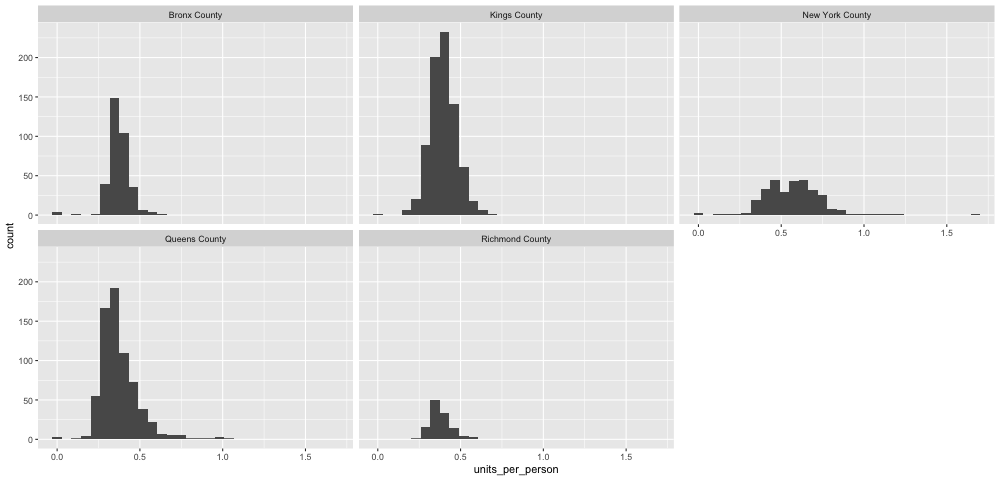

In [ ]:
%%R -w 1000

ggplot(nyc_census_data) + 
    aes(x=units_per_person) +
    geom_histogram() + 
    facet_wrap(~borough) 

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 88 rows containing non-finite values (`stat_boxplot()`). 

R[write to console]: 2: Removed 85 rows containing missing values (`geom_point()`). 



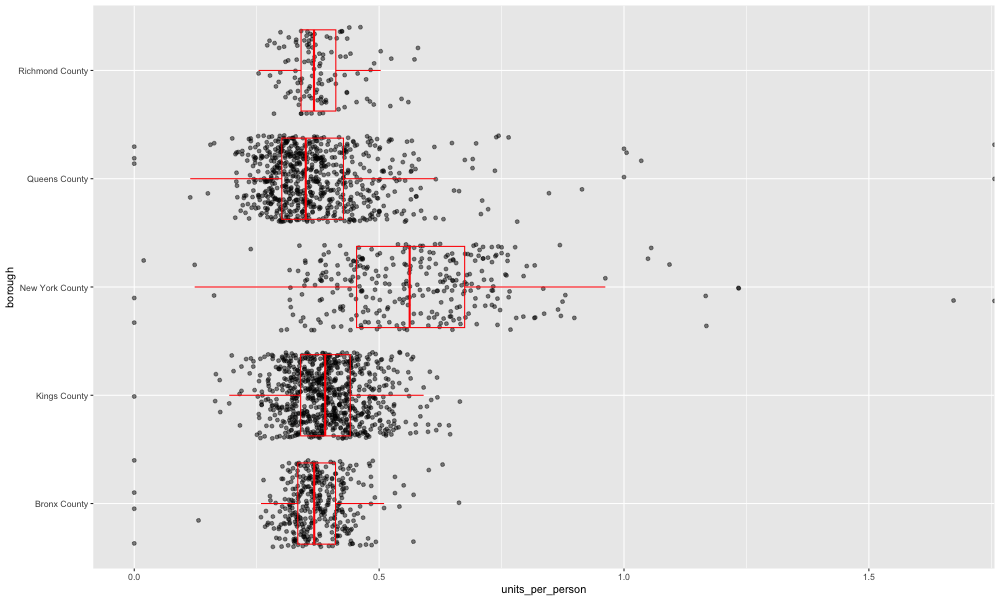

In [ ]:
%%R -w 1000 -h 600

ggplot(nyc_census_data) + 
    aes(x=units_per_person, y=borough) +
    geom_jitter(alpha=0.5) + 
    # overlay a box and whisker plot that is transparent with no outliers and is red
    geom_boxplot(fill=NA, outlier.shape=NA, color="red") 

### Step 6 \| Example Map

See more details about making maps here:

https://walker-data.com/tidycensus/articles/spatial-data.html

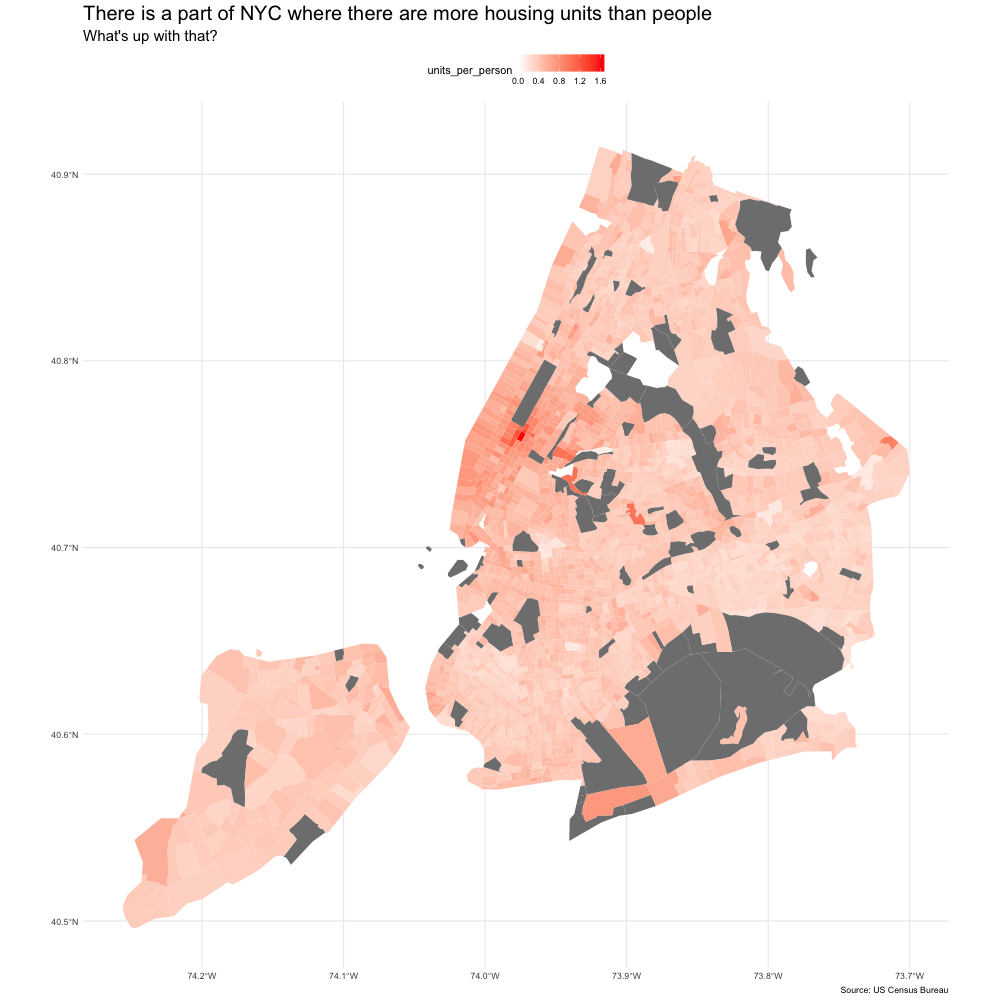

In [ ]:
%%R -w 1000 -h 1000

nyc_census_data %>%
  ggplot(aes(fill = units_per_person)) + 
  geom_sf(color = NA) + 
  scale_fill_gradient(low="white", high="red") + 
  theme_minimal() +
  labs(
    title = "There is a part of NYC where there are more housing units than people",
    subtitle = "What's up with that?",
    caption = "Source: US Census Bureau"
  ) +
  theme(
    #make title and subitle bigger
    plot.title = element_text(size = 20),
    plot.subtitle = element_text(size = 15),
    # move legend to top
    legend.position = "top"
  )


# Step 7 | Hypothesis Test

In this section you will test if the number of units per building is different in census tracts in Manhattan vs Brooklyn.

1. Formulate a null hypothesis (H0) and an alternate hypothesis (Ha)
2. Plot the data
3. Apply a t-test
4. Interpret the result 
5. For yourself (using statsy language like "reject the null hypothesis that TKTK" or "fail to reject the null hypothesis that TKTK")
6. For the reader (how would you explain the result to a reader?)




ðŸ‘‰ Now do the same for census tracts in Bronx vs Queens

ðŸ‘‰ Now do the same for census tracts in Queens vs Staten Island

ðŸ‘‰ make a copy of this notebook (or revisit your ggplot-census notebook), modify the census variable and run it again for something other than housing "units per person"